In [143]:
import pickle

# Data Wrangling
import numpy as np
import pandas as pd

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
from yellowbrick.regressor import residuals_plot, prediction_error

# Future data pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

# Model selection and validation
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV

# Pipeline Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Models
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Sklearn output to pandas
from sklearn import set_config
set_config(transform_output = "pandas")

Dataset Information

This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform.

- Gender: Feature, Categorical, "Gender"
- Age : Feature, Continuous, "Age"
- Height: Feature, Continuous
- Weight: Feature Continuous
- family_history_with_overweight: Feature, Binary, " Has a family member suffered or suffers from overweight? "

- FAVC : Feature, Binary, " Do you eat high caloric food frequently? "
- FCVC : Feature, Integer, " Do you usually eat vegetables in your meals? "
- NCP : Feature, Continuous, " How many main meals do you have daily? "
- CAEC : Feature, Categorical, " Do you eat any food between meals? "
- SMOKE : Feature, Binary, " Do you smoke? "
- CH2O: Feature, Continuous, " How much water do you drink daily? "
- SCC: Feature, Binary, " Do you monitor the calories you eat daily? "
- FAF: Feature, Continuous, " How often do you have physical activity? "
- TUE : Feature, Integer, " How much time do you use technological devices such as cell phone, videogames, television, computer and others? "

- CALC : Feature, Categorical, " How often do you drink alcohol? "
- MTRANS : Feature, Categorical, " Which transportation do you usually use? "
- NObeyesdad : Target, Categorical, "Obesity level" 

# Data Preparation

In [88]:
df = pd.read_csv(r"C:\Users\vanes\Desktop\Kaue Aulas DNC\Kaggle - Obesidade\Pipelines\data\ObesityDataSet_raw_and_data_sinthetic.csv")
df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000000,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,21.000000,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,27.000000,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22.000000,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [89]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [90]:
df.isnull().sum()

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [91]:
df[df.duplicated()]

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
98,21.0,Female,1.52,42.0,Sometimes,no,3.0,1.0,no,no,1.0,no,0.0,0.0,Frequently,Public_Transportation,Insufficient_Weight
106,25.0,Female,1.57,55.0,Sometimes,yes,2.0,1.0,no,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
174,21.0,Male,1.62,70.0,Sometimes,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,no,Public_Transportation,Overweight_Level_I
179,21.0,Male,1.62,70.0,Sometimes,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,no,Public_Transportation,Overweight_Level_I
184,21.0,Male,1.62,70.0,Sometimes,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,no,Public_Transportation,Overweight_Level_I
209,22.0,Female,1.69,65.0,Sometimes,yes,2.0,3.0,no,no,2.0,yes,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
309,16.0,Female,1.66,58.0,no,no,2.0,1.0,no,no,1.0,no,0.0,1.0,Sometimes,Walking,Normal_Weight
460,18.0,Female,1.62,55.0,no,yes,2.0,3.0,no,no,1.0,yes,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
467,22.0,Male,1.74,75.0,no,yes,3.0,3.0,no,no,1.0,yes,1.0,0.0,Frequently,Automobile,Normal_Weight
496,18.0,Male,1.72,53.0,Sometimes,yes,2.0,3.0,no,no,2.0,yes,0.0,2.0,Sometimes,Public_Transportation,Insufficient_Weight


In [92]:
df = df.drop_duplicates()

In [93]:
df['NObeyesdad'].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_II    290
Normal_Weight          282
Overweight_Level_I     276
Insufficient_Weight    267
Name: NObeyesdad, dtype: int64

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2087 non-null   float64
 1   Gender                          2087 non-null   object 
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   CALC                            2087 non-null   object 
 5   FAVC                            2087 non-null   object 
 6   FCVC                            2087 non-null   float64
 7   NCP                             2087 non-null   float64
 8   SCC                             2087 non-null   object 
 9   SMOKE                           2087 non-null   object 
 10  CH2O                            2087 non-null   float64
 11  family_history_with_overweight  2087 non-null   object 
 12  FAF                             20

In [95]:
df.loc[:, 'FCVC']

0       2.0
1       3.0
2       2.0
3       3.0
4       2.0
       ... 
2106    3.0
2107    3.0
2108    3.0
2109    3.0
2110    3.0
Name: FCVC, Length: 2087, dtype: float64

In [96]:
df.loc[499:533, ['FCVC', 'CALC']]

,FCVC,CALC
499,3.000000,Sometimes
500,3.000000,Sometimes
501,3.000000,Sometimes
502,3.000000,Sometimes
503,3.000000,Sometimes
504,3.000000,Sometimes
505,3.000000,Sometimes
506,3.000000,Sometimes
507,2.000000,Sometimes
508,2.000000,Sometimes


C:\Users\vanes\AppData\Local\Temp\ipykernel_13972\2471054408.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()
C:\Users\vanes\AppData\Local\Temp\ipykernel_13972\2471054408.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt='.2f', center=0, vmax=1, vmin=-1, cmap='RdBu_r')


<Axes: >

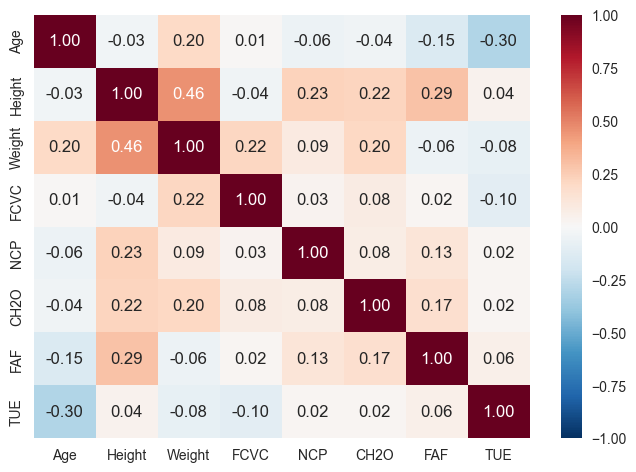

In [97]:
df.corr()
sns.heatmap(df.corr(), annot=True, fmt='.2f', center=0, vmax=1, vmin=-1, cmap='RdBu_r')

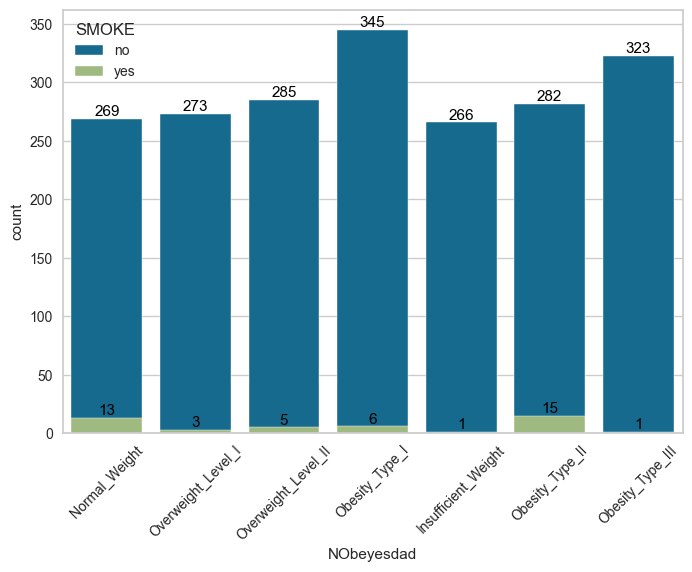

In [98]:
sns.countplot(data=df, x='NObeyesdad', hue='SMOKE', dodge=False)
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                        textcoords='offset points')
plt.xticks(rotation=45)
plt.show()

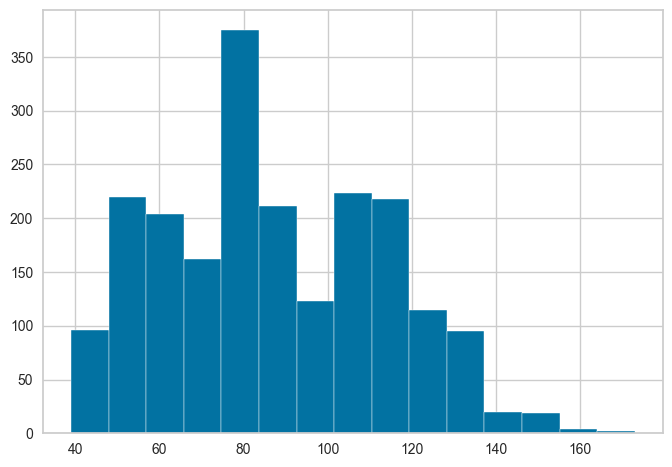

In [99]:
plt.hist(df['Weight'], bins=15)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

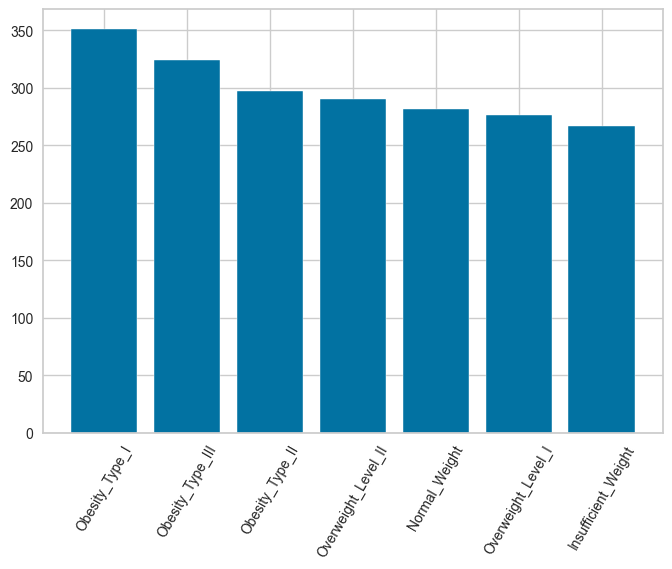

In [100]:
plt.bar(df['NObeyesdad'].value_counts().index, df['NObeyesdad'].value_counts().values)
plt.xticks(rotation=60)
plt.show

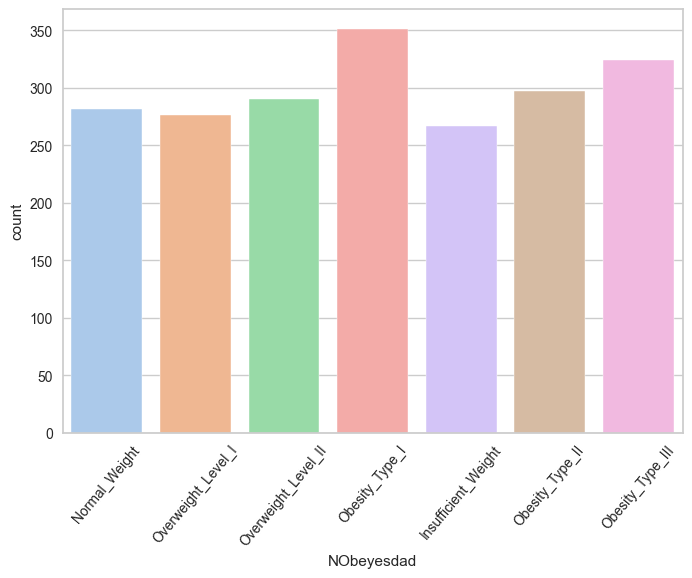

In [101]:
sns.countplot(data=df, x='NObeyesdad', palette='pastel')
plt.xticks(rotation=50);

Text(0.5, 0, 'High caloric food frequency')

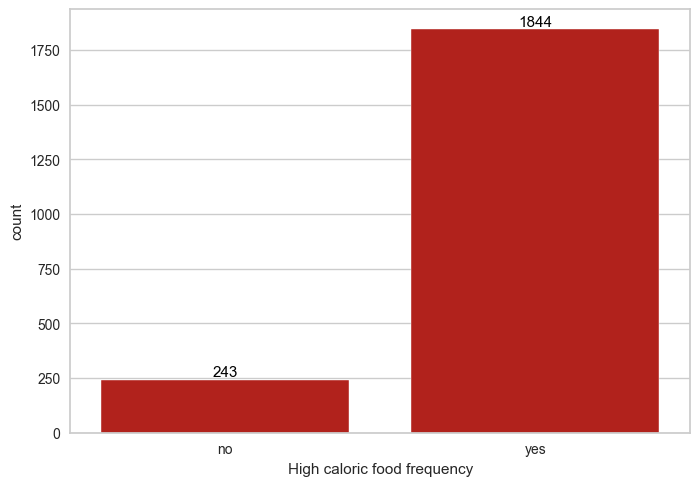

In [102]:
sns.countplot(data=df, x='FAVC', color='r')
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                        textcoords='offset points')
plt.xlabel('High caloric food frequency')

In [103]:
df.groupby('Gender')['NObeyesdad'].count()

Gender
Female    1035
Male      1052
Name: NObeyesdad, dtype: int64

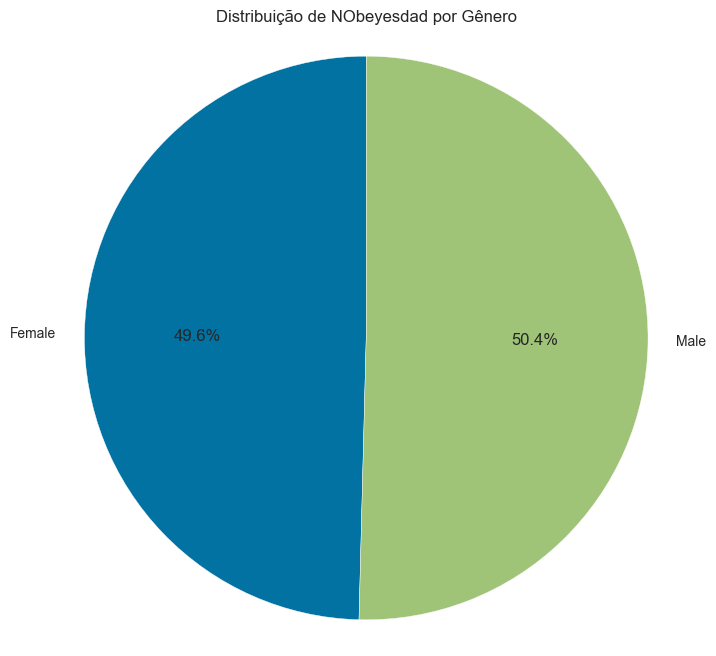

In [118]:
gender_count = df.groupby('Gender')['NObeyesdad'].count()
plt.figure(figsize=(8, 8)) 
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', startangle=90)  
plt.title('Distribuição de NObeyesdad por Gênero')  
plt.axis('equal')  
plt.show() 

In [104]:
df.groupby('NObeyesdad')['Gender'].count()

NObeyesdad
Insufficient_Weight    267
Normal_Weight          282
Obesity_Type_I         351
Obesity_Type_II        297
Obesity_Type_III       324
Overweight_Level_I     276
Overweight_Level_II    290
Name: Gender, dtype: int64

In [105]:
contagem_linhas = df.groupby(['NObeyesdad', 'Gender']).size().reset_index(name='Contagem')
print(contagem_linhas)


             NObeyesdad  Gender  Contagem
0   Insufficient_Weight  Female       169
1   Insufficient_Weight    Male        98
2         Normal_Weight  Female       137
3         Normal_Weight    Male       145
4        Obesity_Type_I  Female       156
5        Obesity_Type_I    Male       195
6       Obesity_Type_II  Female         2
7       Obesity_Type_II    Male       295
8      Obesity_Type_III  Female       323
9      Obesity_Type_III    Male         1
10   Overweight_Level_I  Female       145
11   Overweight_Level_I    Male       131
12  Overweight_Level_II  Female       103
13  Overweight_Level_II    Male       187


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Insufficient_Weight'),
  Text(1, 0, 'Normal_Weight'),
  Text(2, 0, 'Obesity_Type_I'),
  Text(3, 0, 'Obesity_Type_II'),
  Text(4, 0, 'Obesity_Type_III'),
  Text(5, 0, 'Overweight_Level_I'),
  Text(6, 0, 'Overweight_Level_II')])

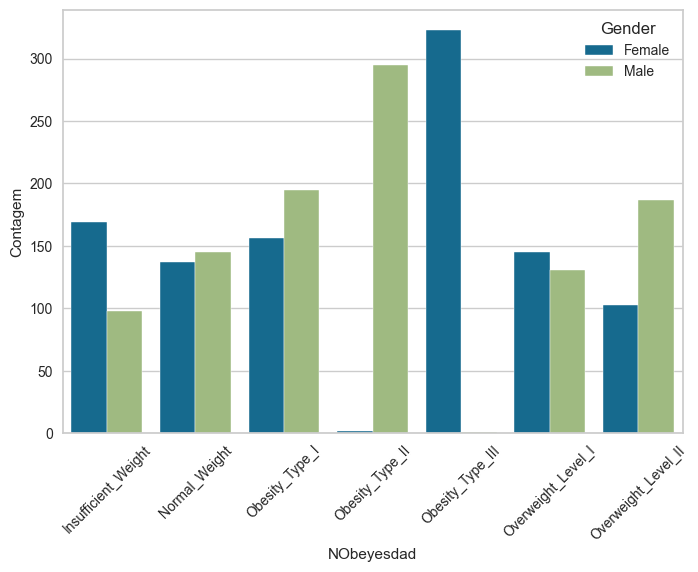

In [106]:

sns.set_style("whitegrid")
sns.barplot(data=contagem_linhas, x='NObeyesdad', y='Contagem', hue='Gender')
plt.xticks(rotation=45)

<Axes: xlabel='Age', ylabel='NObeyesdad'>

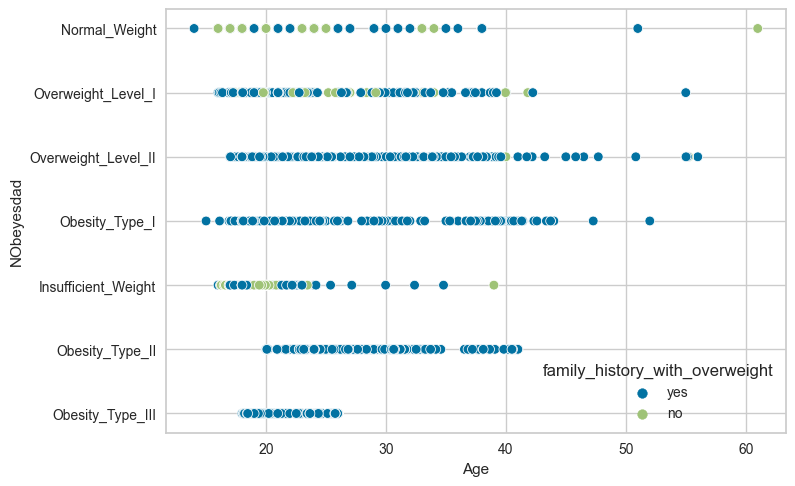

In [120]:
sns.scatterplot(x='Age', y='NObeyesdad', data=df, hue='family_history_with_overweight')

<Axes: xlabel='FAF', ylabel='NObeyesdad'>

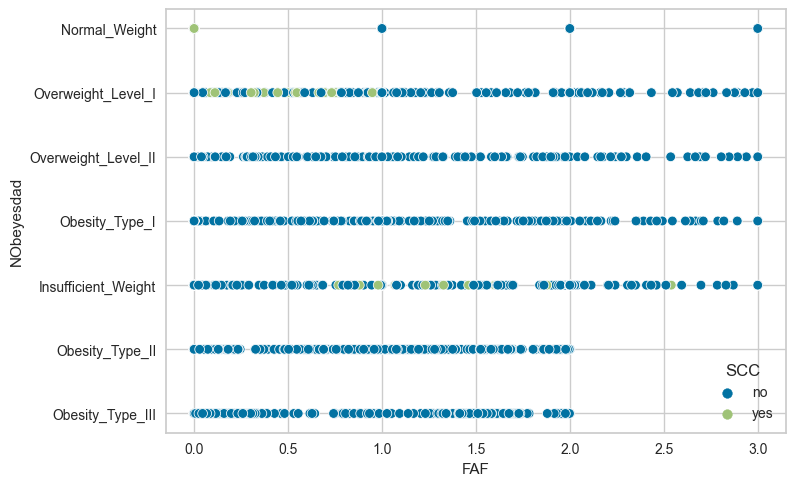

In [123]:
sns.scatterplot(x='FAF', y='NObeyesdad', data=df, hue='SCC')


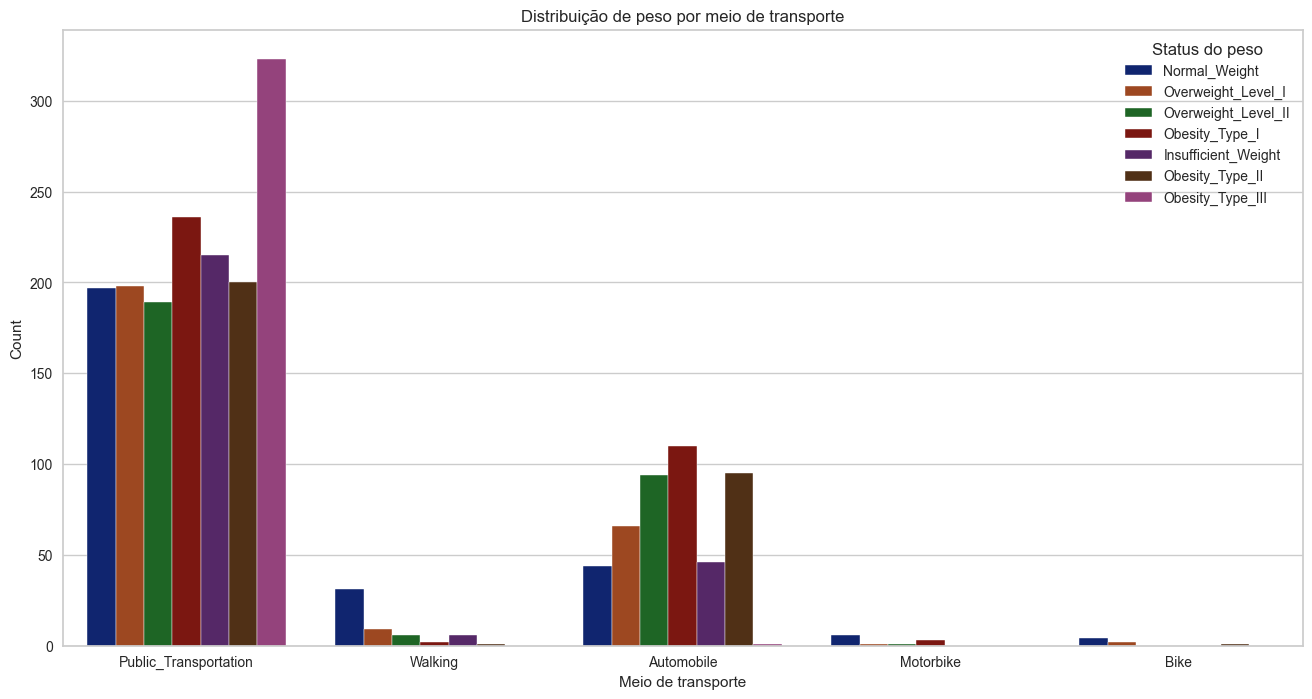

In [141]:
plt.figure(figsize=(16, 8))
sns.countplot(data=df, x='MTRANS', hue="NObeyesdad", palette="dark")
plt.title("Distribuição de peso por meio de transporte")
plt.xlabel('Meio de transporte')
plt.ylabel("Count")
plt.legend(title="Status do peso")
plt.show()

In [108]:
df_encoded = df.copy()
df_encoded.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [109]:
df_encoded['NObeyesdad'] = df_encoded['NObeyesdad'].astype('category')
mapping = {
    'Insufficient_Weight': 1,
    'Normal_Weight': 2,
    'Overweight_Level_I': 3,
    'Overweight_Level_II': 4,
    'Obesity_Type_I': 5,
    'Obesity_Type_II': 6,
    'Obesity_Type_III': 7
}


# Aplicando o mapeamento usando a função map()
df_encoded['NObeyesdad'] = df_encoded['NObeyesdad'].map(mapping)

# Imprimindo o DataFrame após a aplicação do mapeamento
df_encoded.head()


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,2
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,2
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,2
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,3
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,4


In [130]:
categorical_columns = df_encoded.select_dtypes(include="object").columns
print(categorical_columns)
numerical_columns = df_encoded.select_dtypes(include="number").columns
print(numerical_columns)

FEATURES = list(categorical_columns)+list(numerical_columns)
TARGET = 'NObeyesdad'

Index(['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE',
       'family_history_with_overweight', 'CAEC', 'MTRANS'],
      dtype='object')
Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')


In [131]:
X = df_encoded[FEATURES]
y = df_encoded[TARGET]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=123)

In [133]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

categorical_transformer = OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False)

preprocessor = ColumnTransformer([
    ('num', numerical_transformer, numerical_columns),
    ('cat', categorical_transformer, categorical_columns)
])


preprocessor.fit_transform(X_train)

,num__Age,num__Height,num__Weight,num__FCVC,num__NCP,num__CH2O,num__FAF,num__TUE,cat__Gender_Male,cat__CALC_Always,...,cat__family_history_with_overweight_yes,cat__CAEC_Always,cat__CAEC_Frequently,cat__CAEC_Sometimes,cat__CAEC_no,cat__MTRANS_Automobile,cat__MTRANS_Bike,cat__MTRANS_Motorbike,cat__MTRANS_Public_Transportation,cat__MTRANS_Walking
1044,0.108320,0.169673,0.249190,1.000000,0.671603,0.500000,0.665843,0.500000,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
719,0.183532,0.473253,0.082630,0.984603,0.736810,0.882938,0.203679,0.650346,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1836,0.164083,0.557557,0.705551,1.000000,0.666667,0.937168,0.541660,0.412805,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1593,0.225478,0.738197,0.612710,1.000000,0.567230,0.869242,0.330751,0.000000,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1133,0.478528,0.734846,0.393555,0.500000,0.665805,0.129727,0.311739,0.498800,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,0.642214,0.559642,0.528812,0.588159,0.662212,0.007836,0.313803,0.000000,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1171,0.562909,0.419645,0.298570,0.901064,0.666667,0.372314,0.000000,0.360584,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1790,0.217801,0.685888,0.606699,0.998358,0.597122,0.813155,0.398299,0.017448,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1146,0.411063,0.662237,0.387984,0.500000,0.666667,0.099758,0.015913,0.081665,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [144]:
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=1000))
])

model_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE',
       'family_history_with_overweight', 'CAEC', 'MTRANS'],
      dtype='object'))])),
                ('model', LogisticRegression(max_iter=1000))])

In [145]:
model_pipeline.named_steps

{'preprocessor': ColumnTransformer(transformers=[('num',
                                  Pipeline(steps=[('imputer', SimpleImputer()),
                                                  ('scaler', MinMaxScaler())]),
                                  Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')),
                                 ('cat',
                                  OneHotEncoder(drop='if_binary',
                                                handle_unknown='ignore',
                                                sparse_output=False),
                                  Index(['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE',
        'family_history_with_overweight', 'CAEC', 'MTRANS'],
       dtype='object'))]),
 'model': LogisticRegression(max_iter=1000)}

In [148]:
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE',
       'family_history_with_overweight', 'CAEC', 'MTRANS'],
      dtype='object'))])),
                ('model', LogisticRegression(max_iter=1000))])

In [149]:
y_pred = model_pipeline.predict(X_test)


In [150]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7679425837320574


In [151]:
params = {
    'model__C': [0.1, 1, 10],  # Valores de regularização (penalidade)
    'model__solver': ['liblinear', 'lbfgs'],  # Métodos de otimização
}

# Crie a instância do objeto GridSearchCV
grid_model = GridSearchCV(model_pipeline, params, cv=5, scoring='accuracy', verbose=1)

# Ajuste o modelo aos dados de treinamento
grid_model.fit(X_train, y_train)

# Acurácia do melhor modelo encontrado
print("Melhores parâmetros:", grid_model.best_params_)
print("Acurácia do melhor modelo:", grid_model.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


c:\Users\vanes\miniconda3\envs\ml\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\vanes\miniconda3\envs\ml\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\vanes\miniconda3\envs\ml\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\vanes\miniconda3\envs\ml\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\vanes\miniconda3\envs\ml\lib\site-packages\sklearn\prep

Melhores parâmetros: {'model__C': 10, 'model__solver': 'lbfgs'}
Acurácia do melhor modelo: 0.826843610077143


In [152]:
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=1000, C=10, solver='lbfgs'))
])

model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE',
       'family_history_with_overweight', 'CAEC', 'MTRANS'],
      dtype='object'))])),
                ('model', LogisticRegression(C=10, max_iter=1000))])

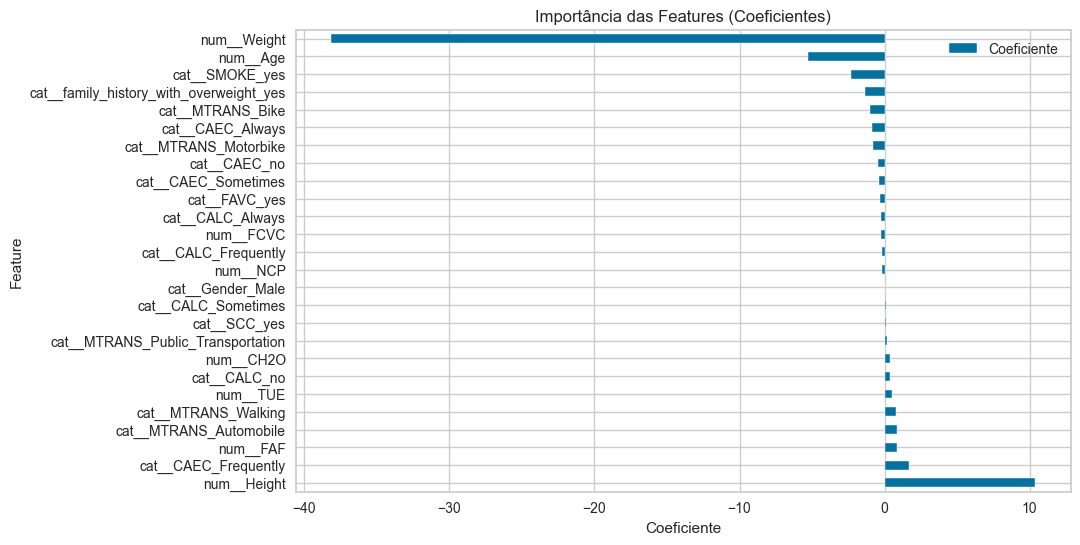

In [156]:
# Após ajustar o modelo aos dados de treinamento
model_pipeline.fit(X_train, y_train)

# Obtenha os coeficientes das features do modelo de regressão logística
coeficientes = model_pipeline.named_steps['model'].coef_[0]

# Crie um DataFrame para visualizar os coeficientes das features
coef_df = pd.DataFrame({'Feature': model_pipeline.named_steps['preprocessor'].get_feature_names_out(), 'Coeficiente': coeficientes})

# Exiba os coeficientes das features em ordem de importância
coef_df.sort_values(by='Coeficiente', ascending=False).plot.barh(x='Feature', y='Coeficiente', figsize=(10, 6))
plt.xlabel('Coeficiente')
plt.ylabel('Feature')
plt.title('Importância das Features (Coeficientes)')
plt.show()
